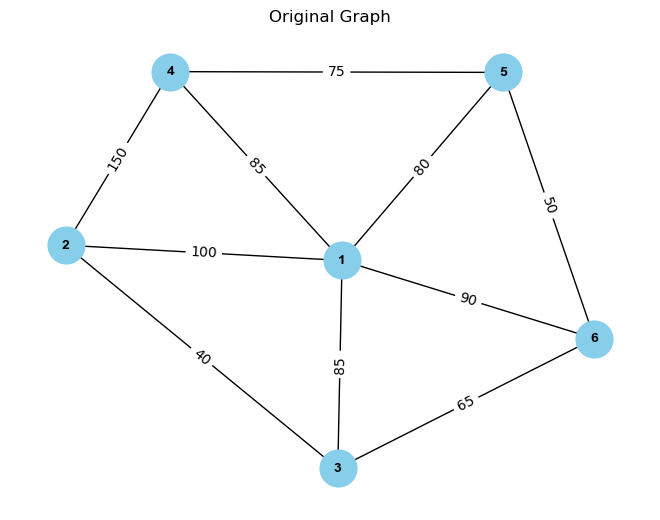

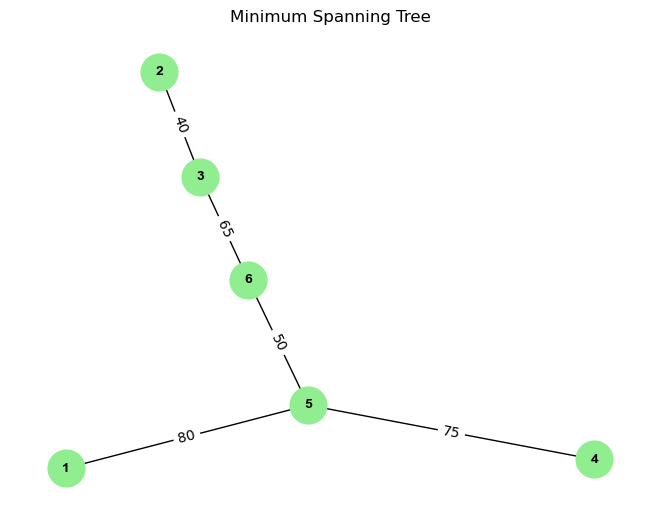

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


class Graph:
    def __init__(self):
        self.vertices = set()
        self.edges = []


    def add_edge(self, from_node, to_node, weight):
        self.vertices.add(from_node)
        self.vertices.add(to_node)
        self.edges.append((from_node, to_node, weight))


    def prim(self):
        mst = []
        visited = set()


        # Choose the starting vertex (assuming it's 1 in this case)
        start_vertex = next(iter(self.vertices))
        visited.add(start_vertex)


        while len(visited) < len(self.vertices):
            min_edge = None


            for edge in self.edges:
                if edge[0] in visited and edge[1] not in visited:
                    if min_edge is None or edge[2] < min_edge[2]:
                        min_edge = edge
                elif edge[1] in visited and edge[0] not in visited:
                    if min_edge is None or edge[2] < min_edge[2]:
                        min_edge = edge


            if min_edge is not None:
                mst.append(min_edge)
                visited.add(min_edge[0])
                visited.add(min_edge[1])


        return mst


# Define the graph
graph = Graph()
graph.add_edge(1, 2, 100)
graph.add_edge(1, 3, 85)
graph.add_edge(1, 6, 90)
graph.add_edge(1, 5, 80)
graph.add_edge(1, 4, 85)
graph.add_edge(3, 6, 65)
graph.add_edge(3, 2, 40)
graph.add_edge(2, 4, 150)
graph.add_edge(4, 5, 75)
graph.add_edge(5, 6, 50)


# Find the minimum spanning tree using Prim's algorithm
minimum_spanning_tree = graph.prim()


# Create a networkx graph
G = nx.Graph()


# Add nodes and edges to the networkx graph
for edge in graph.edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])


# Plot the original graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=10, font_color='black', font_family='Arial')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Original Graph')
plt.show()


# Create a new networkx graph for the minimum spanning tree
MST = nx.Graph()
for edge in minimum_spanning_tree:
    MST.add_edge(edge[0], edge[1], weight=edge[2])


# Plot the minimum spanning tree
pos_mst = nx.spring_layout(MST)
nx.draw(MST, pos_mst, with_labels=True, font_weight='bold', node_size=700, node_color='lightgreen', font_size=10, font_color='black', font_family='Arial')
labels_mst = nx.get_edge_attributes(MST, 'weight')
nx.draw_networkx_edge_labels(MST, pos_mst, edge_labels=labels_mst)
plt.title('Minimum Spanning Tree')
plt.show()


